In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = 'https://raw.githubusercontent.com/markmacwan/bank-customer-classification-ANN/master/datasets_156197_358170_Churn_Modelling.csv'

df = pd.read_csv(url)

In [3]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5480,5481,15659094,Ojiofor,765,Germany,Female,34,8,136729.51,2,0,0,47058.21,0
6681,6682,15736717,Ma,602,France,Male,31,7,155271.83,1,1,1,179446.31,0
7524,7525,15620103,Ho,660,France,Female,40,8,167181.01,1,1,1,185156.94,0
4777,4778,15619801,Batty,548,France,Female,33,1,80107.83,2,0,1,82245.67,0
6928,6929,15804853,McVey,781,France,Female,48,0,57098.96,1,1,0,85644.06,1
2589,2590,15701096,De Garis,778,France,Male,44,8,123863.64,1,1,0,144494.94,0
1670,1671,15716994,Green,559,Spain,Male,24,3,114739.92,1,1,0,85891.02,1
9836,9837,15777958,Ch'ien,587,France,Male,39,10,0.00,2,1,1,170409.45,0
7583,7584,15643574,Odinakachukwu,682,France,Male,26,8,0.00,2,1,0,178373.43,0
5807,5808,15607395,Holt,679,France,Female,33,9,112528.65,2,1,0,177362.45,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe(include='all')


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [7]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### Vizaualization

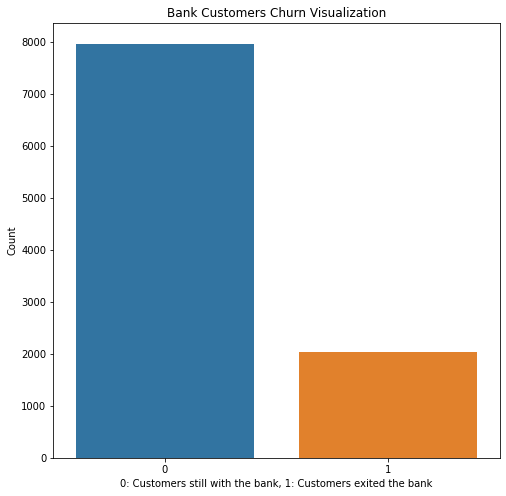

In [8]:
plt.figure(figsize=(8,8))
sns.countplot(x='Exited', data=df)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [0]:
geography = pd.get_dummies(df['Geography'])
gender = pd.get_dummies(df['Gender'], drop_first=True)

In [0]:
df = pd.concat([df, geography, gender], axis=1 )

In [0]:
df.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1


In [0]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=54)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
classifier = Sequential()
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=12))
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model_history = classifier.fit(X_train, y_train, batch_size=10, validation_split=0.33, epochs=100)

Train on 5493 samples, validate on 2707 samples
Epoch 1/100
5493/5493 [==============================] - 1s 194us/step - loss: 0.5502 - accuracy: 0.7943 - val_loss: 0.5184 - val_accuracy: 0.7828
Epoch 2/100
5493/5493 [==============================] - 1s 143us/step - loss: 0.4792 - accuracy: 0.7976 - val_loss: 0.4789 - val_accuracy: 0.7828
Epoch 3/100
5493/5493 [==============================] - 1s 144us/step - loss: 0.4467 - accuracy: 0.7970 - val_loss: 0.4600 - val_accuracy: 0.7832
Epoch 4/100
5493/5493 [==============================] - 1s 142us/step - loss: 0.4302 - accuracy: 0.7977 - val_loss: 0.4514 - val_accuracy: 0.7865
Epoch 5/100
5493/5493 [==============================] - 1s 143us/step - loss: 0.4217 - accuracy: 0.8014 - val_loss: 0.4452 - val_accuracy: 0.7883
Epoch 6/100
5493/5493 [==============================] - 1s 141us/step - loss: 0.4156 - accuracy: 0.8047 - val_loss: 0.4420 - val_accuracy: 0.7931
Epoch 7/100
5493/5493 [==============================] - 1s 148us/step

In [24]:
model_history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

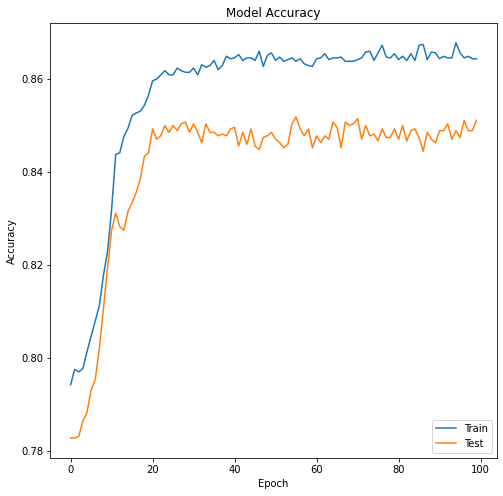

In [25]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

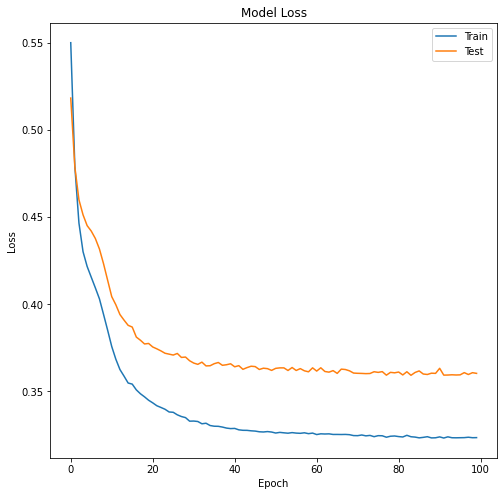

In [26]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [30]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [31]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 87.5%
